<a href="https://colab.research.google.com/github/mmcastillo/al112248/blob/main/Probar_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive/');

Mounted at /content/drive/


In [ ]:
pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import load_model
import natsort
import os
my_model = load_model('/content/drive/MyDrive/DOCTORADO/3DUNet_patches_positivos.hdf5', compile=False)

path_img = '/content/drive/MyDrive/DOCTORADO/Imágenes médicas/ADAM_Patches_Positivos/test/imgs/'
path_mask = '/content/drive/MyDrive/DOCTORADO/Imágenes médicas/ADAM_Patches_Positivos/test/mask/'

test_img_list = os.listdir(path_img)
test_img_list = natsort.natsorted(test_img_list)
test_mask_list = os.listdir(path_mask)
test_mask_list = natsort.natsorted(test_mask_list)



In [ ]:
n = np.random.randint(len(test_img_list))
X_test = np.load(path_img + test_img_list[n])
Y_test = np.load(path_mask + test_mask_list[n])

X_test = np.expand_dims(X_test,axis=-1)
X_test = np.expand_dims(X_test,axis=0)
Y_test = np.expand_dims(Y_test,axis=-1)
Y_test = np.expand_dims(Y_test,axis=0)

print(X_test.shape)
print(Y_test.shape)

(1, 64, 64, 64, 1)
(1, 64, 64, 64, 1)


In [ ]:
test_img_list[n]

'imgs_patches_10075F_54.npy'

imgs_patches_10059B_100.npy

In [ ]:
y_pred=my_model.predict(X_test)
preds_test_thresh = (y_pred >= 0.5).astype(np.uint8)

print(preds_test_thresh.shape)

1/1 [==============================] - 4s 4s/step
(1, 64, 64, 64, 1)


In [ ]:
from ipywidgets import interact
from skimage.measure import label, regionprops

In [ ]:
def explore_3D_image(layer):
  plt.figure(figsize=(10,15))
  plt.subplot(1,3,1)
  plt.imshow(X_test[0,:,:,layer,0],cmap='gray')
  plt.title('X test')
  plt.subplot(1,3,2)
  plt.imshow(Y_test[0,:,:,layer,0])
  plt.title('Y test')
  plt.subplot(1,3,3)
  plt.imshow(preds_test_thresh[0,:,:,layer,0])
  plt.title('Y Pred')
  return layer

In [ ]:
np.unique(preds_test_thresh)

array([0, 1], dtype=uint8)

In [31]:
interact(explore_3D_image , layer=(0,X_test.shape[3]-1))

interactive(children=(IntSlider(value=31, description='layer', max=63), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3D_image(layer)>

Text(0.5, 1.0, 'Y Pred')

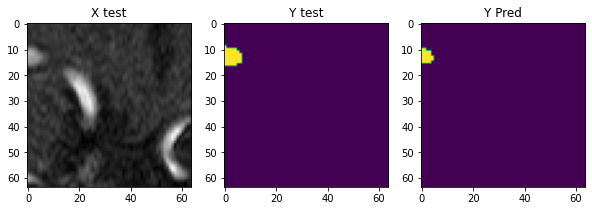

In [33]:
plt.figure(figsize=(10,15))
plt.subplot(1,3,1)
plt.imshow(X_test[0,:,:,15,0],cmap='gray')
plt.title('X test')
plt.subplot(1,3,2)
plt.imshow(Y_test[0,:,:,15,0])
plt.title('Y test')
plt.subplot(1,3,3)
plt.imshow(preds_test_thresh[0,:,:,15,0])
plt.title('Y Pred')

$L(gt, pr) = - gt \alpha (1 - pr)^\gamma \log(pr) - (1 - gt) \alpha pr^\gamma \log(1 - pr)$